In [1]:
!pip install git+https://github.com/Priesemann-Group/covid19_inference_forecast.git
    '''
    this takes about three days of running, so i deside to split the model into three program'''

  Cloning https://github.com/Priesemann-Group/covid19_inference_forecast.git to /private/var/folders/qr/hdfcfrpx0hj50l5g7lwg7ygc0000gn/T/pip-req-build-xl2zbucw
  Running command git clone -q https://github.com/Priesemann-Group/covid19_inference_forecast.git /private/var/folders/qr/hdfcfrpx0hj50l5g7lwg7ygc0000gn/T/pip-req-build-xl2zbucw
  on a case-insensitive filesystem) and only one from the same
  colliding group is in the working tree:

    'DISCLAIMER.md'
    'disclaimer.md'
  Created wheel for covid19-inference: filename=covid19_inference-0.0.10-py3-none-any.whl size=27625 sha256=2e35a30f18a267169e39856f2e60e9b38ca0719646457d7fc0c60025bb90fe06
  Stored in directory: /private/var/folders/qr/hdfcfrpx0hj50l5g7lwg7ygc0000gn/T/pip-ephem-wheel-cache-uvx10bdy/wheels/cc/33/51/375e62e25122e2286fa440949767c3f7f3e2e75f7a2cd4ca7e
Successfully built covid19-inference


In [2]:
import datetime
import time as time_module
import sys
import os 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import theano
import matplotlib
import pymc3 as pm

try: 
    import covid19_inference as cov19
except ModuleNotFoundError:
    sys.path.append('../..')
    import covid19_inference as cov19

path_to_save = '../../figures/'


INFO: This code is not longer developed, use our new module instead: github.com/Priesemann-Group/covid19_inference


In [3]:

confirmed_cases = cov19.get_jhu_confirmed_cases()

country = 'US'
date_data_begin = datetime.datetime(2020,3,8)
date_data_end   = cov19.get_last_date(confirmed_cases)

#date_data_end   = datetime.datetime(2020,3,28)
num_days_data = (date_data_end-date_data_begin).days
diff_data_sim = 16 # should be significantly larger than the expected delay, in 
                   # order to always fit the same number of data points.
num_days_future = 180
date_begin_sim = date_data_begin - datetime.timedelta(days = diff_data_sim)
date_end_sim   = date_data_end   + datetime.timedelta(days = num_days_future)
num_days_sim = (date_end_sim-date_begin_sim).days


cases_obs = cov19.filter_one_country(confirmed_cases, country,
                                     date_data_begin, date_data_end)

print('Cases yesterday ({}): {} and '
      'day before yesterday: {}'.format(date_data_end.isoformat(), *cases_obs[:-3:-1]))

prior_date_mild_dist_begin =  datetime.datetime(2020,3,20)
prior_date_strong_dist_begin =  datetime.datetime(2020,4,27)
prior_date_contact_ban_begin =  datetime.datetime(2020,6,15)

change_points = [dict(pr_mean_date_begin_transient = prior_date_mild_dist_begin,
                      pr_sigma_date_begin_transient = 3,
                      pr_median_lambda = 0.2,
                      pr_sigma_lambda = 0.5),
                 dict(pr_mean_date_begin_transient = prior_date_strong_dist_begin,
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 0.4,
                      pr_sigma_lambda = 0.5),
                 dict(pr_mean_date_begin_transient = prior_date_contact_ban_begin,
                      pr_sigma_date_begin_transient = 1,
                      pr_median_lambda = 0.5,
                      pr_sigma_lambda = 0.5)]

traces = []
models = []
for num_change_points in range(4):
    model = cov19.SIR_with_change_points(new_cases_obs = np.diff(cases_obs),
                                        change_points_list = change_points[:num_change_points],
                                        date_begin_simulation = date_begin_sim,
                                        num_days_sim = num_days_sim,
                                        diff_data_sim = diff_data_sim,
                                        N = 328e6,
                                        priors_dict=None)
    models.append(model)

    traces.append(pm.sample(model=model, init='advi', draws=1000))

Cases yesterday (2020-06-28T00:00:00): 2548996 and day before yesterday: 2510151
pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10


Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 10400
Interrupted at 10,399 [5%]: Average Loss = 2,427.8
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_obs, delay, mu, lambda_0, I_begin]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 3530 seconds.
The number of effective samples is smaller than 10% for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 0 was set to default value 3
pr_sigma_transient_len of change point 0 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 20400
Interrupted at 20,399 [10%]: Average Loss = 1,979.4
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_0, transient_begin_0, lambda_1, lambda_0, I_begin]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 65517 seconds.
The number of effective samples is smaller than 10% for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 1 was set to default value 3
pr_sigma_transient_len of change point 1 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 18500
Interrupted at 18,499 [9%]: Average Loss = 1,977.9
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_1, transient_len_0, transient_begin_1, transient_begin_0, lambda_2, lambda_1, lambda_0, I_begin]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 35497 seconds.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


pr_beta_I_begin was set to default value 100
pr_median_lambda_0 was set to default value 0.4
pr_sigma_lambda_0 was set to default value 0.5
pr_median_mu was set to default value 0.125
pr_sigma_mu was set to default value 0.2
pr_median_delay was set to default value 8
pr_sigma_delay was set to default value 0.2
pr_beta_sigma_obs was set to default value 10
pr_median_transient_len of change point 2 was set to default value 3
pr_sigma_transient_len of change point 2 was set to default value 0.3


Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 19200
Interrupted at 19,199 [9%]: Average Loss = 1,960.4
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_obs, delay, mu, transient_len_2, transient_len_1, transient_len_0, transient_begin_2, transient_begin_1, transient_begin_0, lambda_3, lambda_2, lambda_1, lambda_0, I_begin]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 37576 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [4]:
!pip install git+https://github.com/Priesemann-Group/covid19_inference.git
    
    

  Cloning https://github.com/Priesemann-Group/covid19_inference.git to /private/var/folders/qr/hdfcfrpx0hj50l5g7lwg7ygc0000gn/T/pip-req-build-_sq_bmde
  Running command git clone -q https://github.com/Priesemann-Group/covid19_inference.git /private/var/folders/qr/hdfcfrpx0hj50l5g7lwg7ygc0000gn/T/pip-req-build-_sq_bmde
  Created wheel for covid19-inference: filename=covid19_inference-0.1.8a0-py3-none-any.whl size=85373 sha256=91eee3b4569ee04a9b8c2d7e7c1830a57a9872b9a98d4b1634390ad37da96eb4
  Stored in directory: /private/var/folders/qr/hdfcfrpx0hj50l5g7lwg7ygc0000gn/T/pip-ephem-wheel-cache-g4e0lg0m/wheels/49/b1/39/e7c95d0fd9fc85ca2618197f9099261dc2ec4099c681f9a8a1
Successfully built covid19-inference
  Attempting uninstall: covid19-inference
    Found existing installation: covid19-inference 0.0.10
    Uninstalling covid19-inference-0.0.10:
      Successfully uninstalled covid19-inference-0.0.10


In [21]:
!pip install git+https://github.com/Priesemann-Group/covid19_inference_forecast.git


  Cloning https://github.com/Priesemann-Group/covid19_inference_forecast.git to /private/var/folders/qr/hdfcfrpx0hj50l5g7lwg7ygc0000gn/T/pip-req-build-mristqgr
  Running command git clone -q https://github.com/Priesemann-Group/covid19_inference_forecast.git /private/var/folders/qr/hdfcfrpx0hj50l5g7lwg7ygc0000gn/T/pip-req-build-mristqgr
  on a case-insensitive filesystem) and only one from the same
  colliding group is in the working tree:

    'DISCLAIMER.md'
    'disclaimer.md'
  Created wheel for covid19-inference: filename=covid19_inference-0.0.10-py3-none-any.whl size=27625 sha256=be392c3fc00f2d915191984944dbfacc59cc922dc7394ec81328596475116dee
  Stored in directory: /private/var/folders/qr/hdfcfrpx0hj50l5g7lwg7ygc0000gn/T/pip-ephem-wheel-cache-w_0at_92/wheels/cc/33/51/375e62e25122e2286fa440949767c3f7f3e2e75f7a2cd4ca7e
Successfully built covid19-inference
  Attempting uninstall: covid19-inference
    Found existing installation: covid19-inference 0.1.8a0
    Uninstalling covid19-in

In [34]:
import trace

AttributeError: module 'trace' has no attribute 'new_cases'

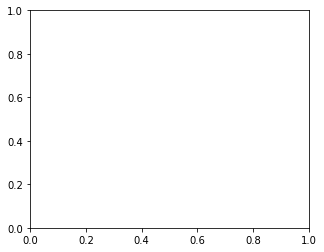

In [35]:
fig, ax = plt.subplots(figsize=(5,4))
time = np.arange(-len(cases_obs)+1, 0)
mpl_dates = conv_time_to_mpl_dates(time) 
ax.plot(mpl_dates, np.abs(np.median(trace.new_cases[:, :num_days_data], axis=0) - np.diff(cases_obs)), 
        'd', markersize=6,
         label='Absolute difference\n'
               'between fit and data')
ax.plot(mpl_dates, np.sqrt(np.median(trace.new_cases[:, :num_days_data], axis=0))*np.median(trace.sigma_obs, axis=0),
         label='Width of the likelihood', lw=3)
ax.set_ylabel('Difference (number of new cases)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')
print(np.median(np.sum(trace.new_cases[:, :num_days_data], axis=1)+ trace.I_begin))
#plt.tight_layout()
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%-m/%-d'))


In [36]:
create_figure_0(save_to = path_to_save)

NameError: name 'create_figure_0' is not defined

In [37]:
exec(open('figures.py').read())

FileNotFoundError: [Errno 2] No such file or directory: 'figures.py'

In [30]:
create_figure_3_timeseries(save_to=path_to_save)

NameError: name 'create_figure_3_timeseries' is not defined

In [28]:
create_figure_3_distributions(models[1], traces[1], layout=2,
                              additional_insets = None, xlim_lambda = (0, 0.53), color = 'tab:red',
                              num_changepoints=1, xlim_tbegin=7, save_to = path_to_save +'Fig_S2')
create_figure_3_distributions(models[2], traces[2], layout=2,
                              additional_insets = None, xlim_lambda = (0, 0.53), color = 'tab:orange',
                              num_changepoints=2, xlim_tbegin=7, save_to = path_to_save +'Fig_4')
create_figure_3_distributions(models[3], traces[3], layout=2,
                              additional_insets = None, xlim_lambda = (0, 0.53), color = 'tab:green',
                              num_changepoints=3, save_to = path_to_save + 'Fig_S4')

NameError: name 'create_figure_3_distributions' is not defined

In [27]:
print('\n0 step model\n')
print(pm.loo(traces[0], model))

print('\n1 step model\n')
print(pm.loo(traces[1], model))

print('\n2 steps model\n')
print(pm.loo(traces[2], model))

print('\n3 steps model\n')
print(pm.loo(traces[3], model))


0 step model



/Users/jessica/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


Computed from 8000 by 121 log-likelihood matrix

         Estimate       SE
elpd_loo -1556.20    34.19
p_loo       17.89        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      119   98.3%
 (0.5, 0.7]   (ok)          2    1.7%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%


The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if
you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive
accuracy.

1 step model



/Users/jessica/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


Computed from 8000 by 121 log-likelihood matrix

         Estimate       SE
elpd_loo -1168.64    17.41
p_loo       15.06        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      118   97.5%
 (0.5, 0.7]   (ok)          3    2.5%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%


The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if
you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive
accuracy.

2 steps model



/Users/jessica/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/Users/jessica/opt/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:683: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "
/Users/jessica/opt/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` with

Computed from 8000 by 121 log-likelihood matrix

         Estimate       SE
elpd_loo -1163.64    16.78
p_loo       26.75        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      116   95.9%
 (0.5, 0.7]   (ok)          2    1.7%
   (0.7, 1]   (bad)         3    2.5%
   (1, Inf)   (very bad)    0    0.0%


The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if
you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive
accuracy.

3 steps model

Computed from 8000 by 121 log-likelihood matrix

         Estimate       SE
elpd_loo -1107.57    14.34
p_loo       14.62        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      114   94.2%
 (0.5, 0.7]   (ok)       

/Users/jessica/opt/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:683: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


In [ ]:
for i in range(4):
    print('λ_{}*: '.format(i))
    print(print_median_CI(trace['lambda_{}'.format(i)] - trace.mu, prec=3))
    print('\n')

In [38]:
print ('traces[0].λ')

traces[0].λ


In [39]:
print('λ_{}*: '.format(i))

NameError: name 'i' is not defined

In [40]:
print ('λ_{}*: ')

λ_{}*: 


In [43]:
  print(print_median_CI(trace['lambda_{}'.format(i)] - trace.mu, prec=3))

NameError: name 'i' is not defined

In [42]:
def truncate_number(number, precision):
    number = round(number, ndigits = precision)
    #number = round(number - number%(10**(-precision)),10)
    if precision == 0:
        number = int(round(number))
    return str(number)

def print_median_CI(arr, prec = 2):
    f_trunc = lambda n: truncate_number(n, prec)
    med = f_trunc(np.median(arr))
    perc1, perc2 = f_trunc(np.percentile(arr, q=2.5)), f_trunc(np.percentile(arr, q=97.5))
    #print('The 95% CI of {} is [{:.3f} , {:.3f}] with a median of {:.3f}'.format(label, med, perc1, perc2))
    return 'Median: {}\nCI: [{}, {}]'.format(med, perc1, perc2)

def conv_time_to_mpl_dates(arr):
    return matplotlib.dates.date2num([datetime.timedelta(days=float(date)) + date_data_end for date in arr])


In [44]:
print(print_median_CI(trace['lambda_{}'] - trace.mu, prec=3))

TypeError: 'module' object is not subscriptable

In [45]:
$\lambda$

SyntaxError: invalid syntax (<ipython-input-45-8a11c0825c5c>, line 1)

In [46]:
print ($\lambda$)

SyntaxError: invalid syntax (<ipython-input-46-e72941fe8d4c>, line 1)

In [47]:
print_median_CI(trace.λ, prec=2)

AttributeError: module 'trace' has no attribute 'λ'

In [48]:
print_median_CI(traces[1], prec=2)

TypeError: '<' not supported between instances of 'dict' and 'dict'

AttributeError: module 'trace' has no attribute 'new_cases_past'

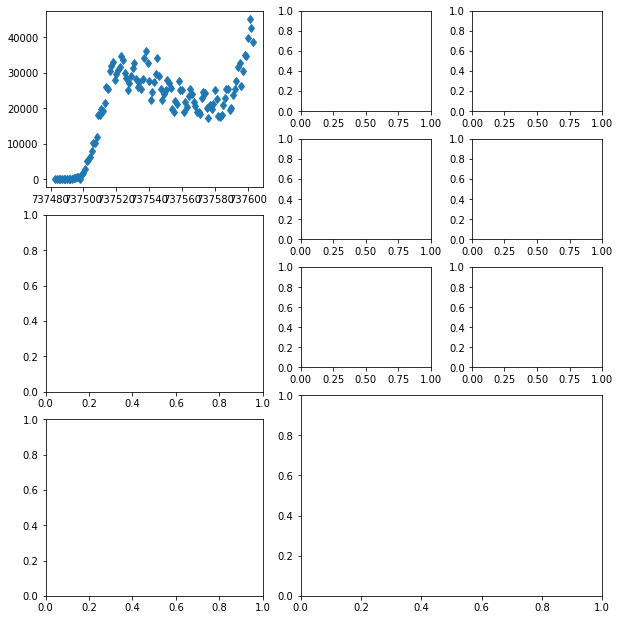

In [49]:
def truncate_number(number, precision):
    number = round(number, ndigits = precision)
    #number = round(number - number%(10**(-precision)),10)
    if precision == 0:
        number = int(round(number))
    return str(number)

def print_median_CI(arr, prec = 2):
    f_trunc = lambda n: truncate_number(n, prec)
    med = f_trunc(np.median(arr))
    perc1, perc2 = f_trunc(np.percentile(arr, q=2.5)), f_trunc(np.percentile(arr, q=97.5))
    #print('The 95% CI of {} is [{:.3f} , {:.3f}] with a median of {:.3f}'.format(label, med, perc1, perc2))
    return 'Median: {}\nCI: [{}, {}]'.format(med, perc1, perc2)

def conv_time_to_mpl_dates(arr):
    return matplotlib.dates.date2num([datetime.timedelta(days=float(date)) + date_data_end for date in arr])

#Definitions
letter_size = 15
ci_location = [0.95,0.9]
alpha_texbox = 0.3
font_text = 10

#Making all square for simplicity
len1 = 5
len2 = 3

fig = plt.figure(figsize=(8.5,8.5),constrained_layout=True)
gs = fig.add_gridspec(15,11)

ax_cases_new = fig.add_subplot(gs[0:len1,0:len1])
ax_cases_total = fig.add_subplot(gs[len1:2*len1,0:len1])
ax_error = fig.add_subplot(gs[2*len1:3*len1,0:len1])

ax_param_infection  = fig.add_subplot(gs[0:len2,len1:len1+len2])
ax_param_recovery = fig.add_subplot(gs[0:len2,len1+len2:len1+2*len2])

ax_param_izero = fig.add_subplot(gs[len2:2*len2,len1:len1+len2])
ax_param_delay = fig.add_subplot(gs[len2:2*len2,len1+len2:len1+2*len2])

ax_param_width = fig.add_subplot(gs[2*len2:3*len2,len1:len1+len2])
ax_param_effective_rate = fig.add_subplot(gs[2*len2:3*len2,len1+len2:len1+2*len2])

ax_likelihood = fig.add_subplot(gs[3*len2:3*len1,len1:len1+2*len2])

#Plots things
pos_letter = (-0.2, 1.05)

ax = ax_cases_new
time = np.arange(-len(cases_obs)+1, 0)
mpl_dates = conv_time_to_mpl_dates(time) 
start_date, end_date = mpl_dates[0], mpl_dates[-1]
ax.plot(mpl_dates, np.diff(cases_obs), 'd', markersize=6, label='Data')
percentiles = np.percentile(trace.new_cases_past, q=2.5, axis=0), np.percentile(trace.new_cases_past, q=97.5, axis=0)
ax.plot(mpl_dates, np.median(trace.new_cases_past, axis=0),color='tab:orange', label='Fit (with 95% CI)', lw=3)
ax.fill_between(mpl_dates, percentiles[0], percentiles[1], alpha=0.3, color='tab:orange')
ax.set_yscale('log')
ax.set_ylabel('Number of new cases')
ax.set_xlabel('Date')
ax.legend()
ax.text(pos_letter[0], pos_letter[1], "A", transform=ax.transAxes, size=letter_size)
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%-m/%-d'))
ax.set_xlim(start_date, end_date)

ax = ax_cases_total
ax.plot(mpl_dates, cases_obs[1:], 'd', markersize=6, label='Data')
cum_cases = np.cumsum(trace.new_cases_past, axis=1) + cases_obs[0]
percentiles = np.percentile(cum_cases, q=2.5, axis=0), np.percentile(cum_cases, q=97.5, axis=0)
ax.plot(mpl_dates, np.median(cum_cases, axis=0),color='tab:orange', label='Fit (with 95% CI)', lw=3)
ax.fill_between(mpl_dates, percentiles[0], percentiles[1], alpha=0.3, color='tab:orange')
ax.set_yscale('log')
ax.set_ylabel('Total number of cases')
ax.set_xlabel('Date')
#ax.legend()
ax.text(pos_letter[0], pos_letter[1], "B", transform=ax.transAxes, size=letter_size)
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%-m/%-d'))
ax.set_xlim(start_date, end_date)

ax = ax_error
ax.plot(mpl_dates, np.abs(np.median(trace.new_cases_past, axis=0) - np.diff(cases_obs)), 
        'd', markersize=6,
         label='Absolute difference\n'
               'between fit and data')
ax.plot(mpl_dates, np.sqrt(np.median(trace.new_cases_past, axis=0))*np.median(trace.σ_obs, axis=0),
         label='Width of the likelihood', lw=3)
ax.set_ylabel('Difference\n(number of new cases)')
ax.set_xlabel('Date')
ax.legend(loc='upper left')
print(np.median(np.sum(trace.new_cases_past[:, :-2], axis=1)+ trace.I_begin))
ax.text(pos_letter[0], pos_letter[1], "C", transform=ax.transAxes, size=letter_size)
#plt.tight_layout()
ax.xaxis.set_major_locator(matplotlib.dates.AutoDateLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%-m/%-d'))
ax.set_xlim(start_date, end_date)
plt.savefig(path_to_save + 'check_fit_composed.png', dpi=300)

ax = ax_param_infection
ax.hist(trace.λ, bins=50, density=True, color='tab:orange',
        label='Posterior')
limits = ax.get_xlim()
x = np.linspace(*limits, num=100)
ax.plot(x, scipy.stats.lognorm.pdf(x, scale=0.4, s=0.5), label='Prior',
        color="#708090", linewidth=3)
ax.set_xlim(*limits)
ax.set_ylabel('Density')
ax.set_xlabel('Infection rate $\lambda$')
text = print_median_CI(trace.λ, prec=2)
ax.text(ci_location[0], ci_location[1], text, horizontalalignment='right',
      verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='white', alpha=alpha_texbox,edgecolor='none'),fontsize=font_text)
ax.text(pos_letter[0], pos_letter[1], "D", transform=ax.transAxes, size=letter_size)
#ax.legend(loc='upper right')

ax = ax_param_recovery
ax.hist(trace.μ, bins=50, density=True, color='tab:orange',
        label='Posterior')
limits = ax.get_xlim()
x = np.linspace(*limits, num=100)
ax.plot(x, scipy.stats.lognorm.pdf(x, scale=1/8, s=0.2), label='Prior',
        color="#708090", linewidth=3)
ax.set_xlim(*limits)
ax.set_ylabel('Density')
ax.set_xlabel('Recovery rate $\mu$')
text = print_median_CI(trace.μ, prec=2)
ax.text(ci_location[0], ci_location[1], text, horizontalalignment='right',
      verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='white', alpha=alpha_texbox,edgecolor='none'),fontsize=font_text)
ax.text(pos_letter[0], pos_letter[1], "E", transform=ax.transAxes, size=letter_size)
#ax.legend(loc='upper right')

ax = ax_param_effective_rate
ax.locator_params(nbins=5)
#bins = np.linspace(-0.11, 0.304, 200)
ax.hist((trace.λ - trace.μ)*100, bins=50, color='tab:orange')
ax.set_xlabel('Eff. growth rate $\lambda^* = \lambda - \mu$ (%)')#\n'
          #'inferred from data - from {} to {}'.format(date_data_begin.isoformat(), 
          #                                            date_data_end.isoformat()))
ax.set_ylabel('Number of Monte-Carlo samples')
text = print_median_CI((trace.λ - trace.μ)*100, prec=0)
ax.text(ci_location[0], ci_location[1], text, horizontalalignment='right',
      verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='white', alpha=alpha_texbox,edgecolor='none'),fontsize=font_text)
ax.text(pos_letter[0], pos_letter[1], "I", transform=ax.transAxes, size=letter_size)

ax = ax_param_delay
ax.hist(trace.delay, bins=50, density=True, color='tab:orange',
        label='Posterior')
limits = ax.get_xlim()
x = np.linspace(*limits, num=100)
ax.plot(x, scipy.stats.lognorm.pdf(x, scale=8, s=0.2), label='Prior',
        color="#708090", linewidth=3)
ax.set_xlim(*limits)
ax.set_ylabel('Density')
ax.set_xlabel('Delay $D$')
text = print_median_CI(trace.delay, prec=1)
ax.text(ci_location[0], ci_location[1], text, horizontalalignment='right',
      verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='white', alpha=alpha_texbox,edgecolor='none'),fontsize=font_text)
#ax.legend(loc='upper right')
ax.text(pos_letter[0], pos_letter[1], "G", transform=ax.transAxes, size=letter_size)

ax = ax_param_width
ax.hist(trace.σ_obs, bins=50, color='tab:orange', density=True, label='Posterior')
ax.set_ylabel('Density')
ax.set_xlabel("Scale factor $\sigma$ of likelihood")
limits = ax.get_xlim()
x = np.linspace(*limits, num=100)
ax.plot(x, scipy.stats.halfcauchy.pdf(x, scale=10), label='Prior',
        color="#708090", linewidth=3)
ax.set_xlim(*limits)
text = print_median_CI(trace.σ_obs, prec=1)
ax.text(ci_location[0], ci_location[1], text, horizontalalignment='right',
      verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='white', alpha=alpha_texbox,edgecolor='none'),fontsize=font_text)
#ax.legend(loc='upper right')
ax.text(pos_letter[0], pos_letter[1], "H", transform=ax.transAxes, size=letter_size)

ax = ax_param_izero
ax.hist(trace.I_begin, bins=50, color='tab:orange', density=True, label='Posterior')
ax.set_ylabel('Density')
ax.set_xlabel('Number of infections at begin $I_0$')
limits = ax.get_xlim()
x = np.linspace(*limits, num=5000)
ax.plot(x, scipy.stats.halfcauchy.pdf(x, scale=100), label='Prior',
        color="#708090", linewidth=3)
ax.set_xlim(*limits)
ax.set_xlim(0)
text = print_median_CI(trace.I_begin, prec=0)
ax.text(ci_location[0], ci_location[1], text, horizontalalignment='right',
      verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='white', alpha=alpha_texbox,edgecolor='none'),fontsize=font_text)
ax.legend(loc='lower right')
ax.text(pos_letter[0], pos_letter[1], "F", transform=ax.transAxes, size=letter_size)

ax = ax_likelihood
ax.locator_params(nbins=5)
μ_arr = np.linspace(0.02, 0.3, 25)
#λ_arr = np.linspace(0.2, 0.6, 25)
matrix = pickle.load(open(path_data + 'likelihood_matrix.pickled', 'rb'))
#matrix has [i,j] = [lambda,mu] with i rows -> rows for imshow are y
#so mu is on x axis...as we want to
im_mat = []
print(matrix.shape)
for row in matrix:
    im_mat.append([])
    for elem in row:
        if elem is not None:
            im_mat[-1].append(elem['logp'])
        else: im_mat[-1].append(np.nan)
#fig, ax1 = plt.subplots(1,1)
#im = ax1.imshow(im_mat, origin='lower', extent=[0.02, 0.3, 0.2, 0.6], aspect=0.5)
#plt.colorbar()
#heatmap = ax.imshow(im_mat, origin='lower', extent=[0.02, 0.3, 0.2, 0.6], aspect=0.71)
#heatmap = ax.imshow(im_mat, origin='lower', extent=[0.02, 0.3, 0.2, 0.6])
heatmap = ax.imshow(im_mat,origin='lower',extent=[0.02, 0.3, 0.2, 0.6], aspect='auto')
pos = ax.get_position()
#cbaxes = fig.add_axes([0.43, pos.y0, 0.02, pos.y1-pos.y0])
#cbar = fig.colorbar(heatmap, cbaxes)
#cbar.set_label('log-likelihood')
ax.plot(μ_arr, μ_arr+0.30, color='black')
cbar = plt.colorbar(heatmap)
cbar.set_label('log-likelihood')
ax.set_ylabel('spreading rate $\lambda$')
ax.set_xlabel('recovery rate $\mu$')
ax.text(pos_letter[0], pos_letter[1], "J", transform=ax.transAxes, size=letter_size)
#ax.set_anchor('NW')

#Removes ylabels from D-I
ax_params = [ax_param_infection,ax_param_recovery, ax_param_effective_rate, ax_param_delay,ax_param_width,ax_param_izero]
for ax in ax_params:
  ax.set_yticks([], [])
  ax.set_ylabel('')

#gs.update(wspace=0.9, hspace=0.9)
#gs.update()
#plt.tight_layout()

plt.savefig(path_to_save+'Fig_1.png')
plt.savefig(path_to_save+'Fig_1.pdf')